<a href="https://colab.research.google.com/github/BOOBESH7/BOOBESH7/blob/main/project_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving all-data.csv to all-data.csv


In [ ]:

!pip install -q scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import io

# Load dataset
filename = next(iter(uploaded))  # Gets the uploaded file name
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, encoding='latin-1') # Changed encoding to 'latin-1'

# Rename columns for clarity before accessing them
df = df.rename(columns={0: 'sentiment', 1: 'text'})

# Preview the data
print(df.head())
# Example fix in pandas

  sentiment                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...



Classification Report:

              precision    recall  f1-score   support

    negative       1.00      0.06      0.12       110
     neutral       0.68      0.99      0.80       571
    positive       0.69      0.30      0.42       289

    accuracy                           0.68       970
   macro avg       0.79      0.45      0.45       970
weighted avg       0.72      0.68      0.61       970


Accuracy: 0.6804123711340206
F1 Score (macro): 0.4484729683518021
RMSE: 0.7300614294164905


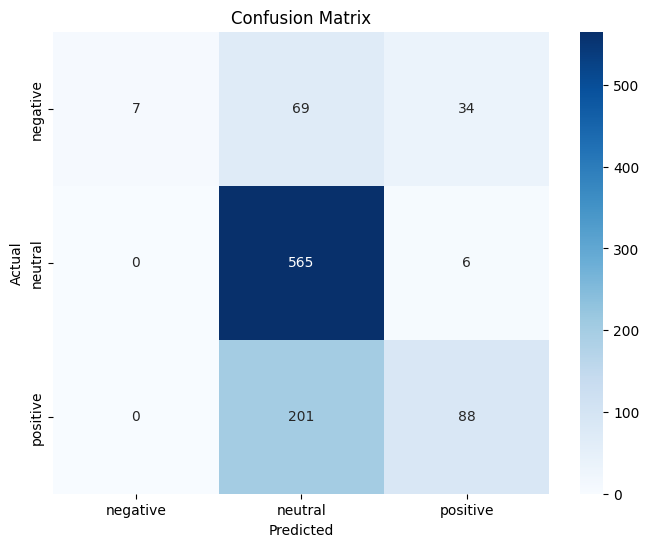

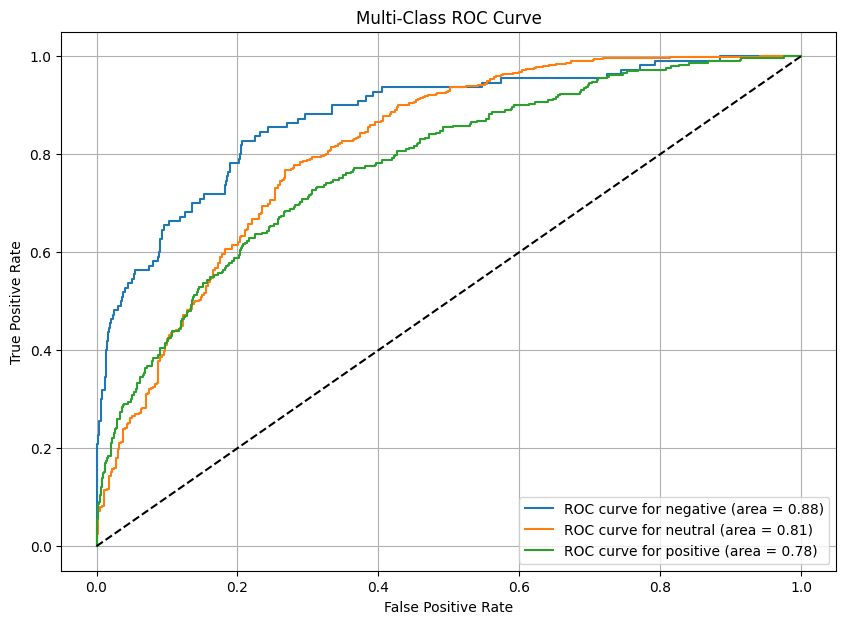

<ipython-input-15-c9046bba7a05>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Set2')


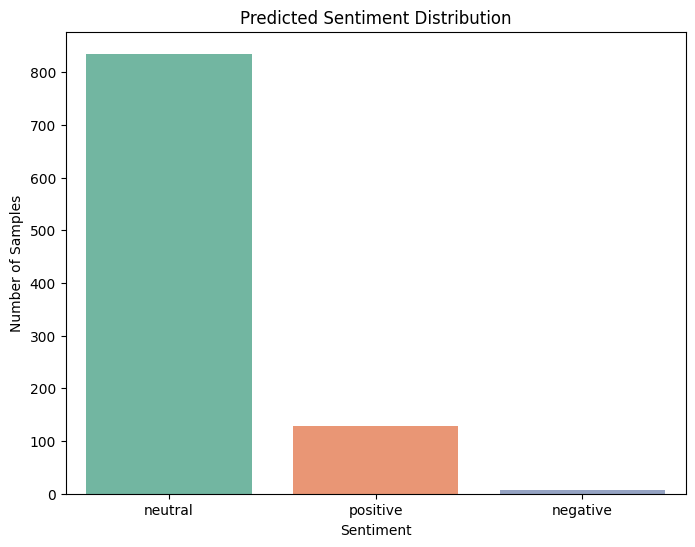

In [15]:
# STEP 1: Upload Dataset

# STEP 2: Import Required Libraries
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, roc_auc_score, roc_curve, mean_squared_error
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# STEP 3: Load and Prepare Dataset
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, encoding='latin-1')
df = df.rename(columns={0: 'sentiment', 1: 'text'})
df = df[['text', 'sentiment']]
df['sentiment'] = df['sentiment'].str.lower()
df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])]  # Keep only 3 classes
df = df.dropna()

# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# STEP 5: Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# STEP 6: Model Training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# STEP 7: Predictions
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)

# STEP 8: Evaluation Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("RMSE:", np.sqrt(mean_squared_error(pd.factorize(y_test)[0], pd.factorize(y_pred)[0])))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# STEP 9: ROC Curve (Multi-Class)
# Binarize the output
classes = ['negative', 'neutral', 'positive']
y_test_bin = label_binarize(y_test, classes=classes)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_proba[:, i])

# Plot ROC curves
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-Class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# STEP 10: Predicted Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette='Set2')
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.show()